# Doing More With Functions

In [1]:
import nltk, re

### Functions as Arguments
So far the arguments we have passed into functions have been simple objects like strings, or structured objects like lists. Python also lets us pass a function as an argument to another function. Now we can abstract out the operation, and apply a different operation on the same data. As the following examples show, we can pass the built-in function len() or a user-defined function last_letter() as arguments to another function:

In [2]:
sent = ['Take', 'care', 'of', 'the', 'sense', ',', 'and', 'the', 
        'sounds', 'will', 'take', 'care', 'of', 'themselves', '.']

def extract_property(prop):
    return [prop(word) for word in sent]

def last_letter(word):
    return word[-1]

extract_property(last_letter)

['e', 'e', 'f', 'e', 'e', ',', 'd', 'e', 's', 'l', 'e', 'e', 'f', 's', '.']

In [3]:
extract_property(lambda x: x[-1])

['e', 'e', 'f', 'e', 'e', ',', 'd', 'e', 's', 'l', 'e', 'e', 'f', 's', '.']

### Debugging Techniques
Since most code errors result from the programmer making incorrect assumptions, the first thing to do when you detect a bug is to check your assumptions. Localize the problem by adding print statements to the program, showing the value of important variables, and showing how far the program has progressed.

In [5]:
def find_words(text, wordlength, result=[]):
     for word in text:
         if len(word) == wordlength:
             result.append(word)
     return result

find_words(['omg', 'teh', 'lolcat', 'sitted', 'on', 'teh', 'mat'], 3)

['omg', 'teh', 'teh', 'mat']

In [6]:
find_words(['omg', 'teh', 'lolcat', 'sitted', 'on', 'teh', 'mat'], 3)

['omg', 'teh', 'teh', 'mat', 'omg', 'teh', 'teh', 'mat']

In [ ]:
import pdb

pdb.run("find_words(['dog'], 3)")

> <string>(1)<module>()
(Pdb) 
(Pdb) 
(Pdb) 
(Pdb) 


## Algorithm Design

### Recursion

We can use recursion to navigate a deeply-nested object, such as the WordNet hypernym hierarchy. Let's count the size of the hypernym hierarchy rooted at a given synset s. We'll do this by finding the size of each hyponym of s, then adding these together (we will also add 1 for the synset itself). The following function size1() does this work; notice that the body of the function includes a recursive call to size1():

In [ ]:
def size1(s):
    return 1 + sum(size1(child) for child in s.hyponyms())

We can also design an iterative solution to this problem which processes the hierarchy in layers. The first layer is the synset itself [1], then all the hyponyms of the synset, then all the hyponyms of the hyponyms. Each time through the loop it computes the next layer by finding the hyponyms of everything in the last layer [3]. It also maintains a total of the number of synsets encountered so far [2].

In [ ]:
def size2(s):
    layer = [s]
    total = 0
    while layer:
        total += len(layer)
        layer = [h for c in layer for h in c.hyponyms()]
    return total

In [18]:
from nltk.corpus import wordnet as wn
dog = wn.synset("dog.n.01")
size1(dog)

190

In [19]:
size2(dog)

190

### Space-Time Tradeoffs
We can sometimes significantly speed up the execution of a program by building an auxiliary data structure, such as an index. The listing in 4.10 implements a simple text retrieval system for the Movie Reviews Corpus. By indexing the document collection it provides much faster lookup.

In [42]:
def raw(file):
    contents = open(file).read()
    contents = re.sub(r"<.*?>", " ", contents)
    contents = re.sub("\s+", " ", contents)
    return contents

def snippet(doc, term):
    text = " " * 30 + raw(doc) + " " * 30
    pos = text.index(term)
    return text[pos - 30: pos + 30]

print("Building Index...")
files = nltk.corpus.movie_reviews.abspaths()
idx = nltk.Index((w, f) for f in files for w in raw(f).split())

query = ""
while query != "quit":
    query = input("query> ")
    if query in idx:
        for doc in idx[query]:
            print(snippet(doc, query))
    else:
        print("Not found")

Building Index...
query> kill
 victims being brutalized and killed on camera . i'm talking
angry that they would like to kill him and sell him for mill
angry that they would like to kill him and sell him for mill
o the next , stopping only to kill the characters which are 
t fine since the character is killed in a near-riot , and ru
t after a pair of lions start killing off the workers in 189
t after a pair of lions start killing off the workers in 189
gain , and jake asks bobby to kill grace . a little while la
gain , and jake asks bobby to kill grace . a little while la
roposition : he'll pay him to kill his lovely wife . mortens
bought us carrie , dressed to kill and mission : impossible 
e of her friends accidentally kill a man , running him down 
adeleine travels to venice to kill herself . while preparing
                    " love to kill " starts off aimlessly an
                    " love to kill " starts off aimlessly an
                    " love to kill " starts off aimless

e blows up a lot of stuff and kills a bunch of people . so w
ohn connor from a newer model killing machine , the t-1000 ;
lfriend so much you wanted to kill her ? " over and over unt
 bunch of people in texas get killed , so a sheriff guy and 
offer david half a million to kill his wife . the artist acc
offer david half a million to kill his wife . the artist acc
offer david half a million to kill his wife . the artist acc
 two hit men are preparing to kill clint eastwood when he ar
l schumacher has successfully killed this cash cow . what ma
ing to prove that she did not kill her spouse . the fugitive
ing to prove that she did not kill her spouse . the fugitive
 and constrictor snakes don't kill what they can't eat , d )
 and constrictor snakes don't kill what they can't eat , d )
ded - " screw it , let's just kill everybody " . from then o
y run into pirates who try to kill them . ? oh , yes ! ? i f
inators , whose purpose is to kill most of the other outland
atter if the hostage tri

query> quit
s funded by her mother . lucy quit working professionally 10
erick . i disliked that movie quite a bit , but since " prac
t disaster . babe ruth didn't quit baseball after one season
o-be fiance . i think she can quit that job and get a more r
 and rose mcgowan should just quit acting . she has no chari
and get a day job . and don't quit it .                     
 kubrick , alas , should have quit while he was ahead . this
everyone involved should have quit while they were still ahe
l die . so what does joe do ? quit his job , of course ! ! w
red " implant . he's ready to quit the biz and get a portion
hat he always recorded , they quit and become disillusioned 
 admit that i ? ? ? ve become quite the " scream " fan . no 
 again , the fact that he has quit his job to feel what it's
school reunion . he has since quit his job as a travel journ
ells one of his friends , " i quit school because i didn't l
ms , cursing off the boss and quitting his job ( " today i q
e , the arri

### Dynamic Programming
Dynamic programming is a general technique for designing algorithms which is widely used in natural language processing. The term 'programming' is used in a different sense to what you might expect, to mean planning or scheduling. Dynamic programming is used when a problem contains overlapping sub-problems. Instead of computing solutions to these sub-problems repeatedly, we simply store them in a lookup table. In the remainder of this section we will introduce dynamic programming, but in a rather different context to syntactic parsing.

Pingala was an Indian author who lived around the 5th century B.C., and wrote a treatise on Sanskrit prosody called the Chandas Shastra. Virahanka extended this work around the 6th century A.D., studying the number of ways of combining short and long syllables to create a meter of length n. Short syllables, marked S, take up one unit of length, while long syllables, marked L, take two. Pingala found, for example, that there are five ways to construct a meter of length 4: V4 = {LL, SSL, SLS, LSS, SSSS}. Observe that we can split V4 into two subsets, those starting with L and those starting with S, as shown in (1).

V4 =

  LL, LSS
    
    i.e. L prefixed to each item of V2 = {L, SS}
    
  SSL, SLS, SSSS
    
    i.e. S prefixed to each item of V3 = {SL, LS, SSS

In [68]:
def virahanka1(n):
    if n == 0:
        return [""]
    elif n == 1:
        return ["S"]
    else:
        s = ["S" + prosody for prosody in virahanka1(n - 1)] # start with S
        l = ["L" + prosody for prosody in virahanka1(n - 2)] # start with L
        return s + l
    
def virahanka2(n):
    lookup = [[""], ["S"]]
    for i in range(n - 1):
        s = ["S" + prosody for prosody in lookup[i + 1]]
        l = ["L" + prosody for prosody in lookup[i]]
        lookup.append(s + l)
    return lookup[n]

def virahanka3(n, lookup={0:[""], 1:["S"]}):
    if n not in lookup:
        s = ["S" + prosody for prosody in virahanka3(n - 1)]
        l = ["L" + prosody for prosody in virahanka3(n - 2)]
        lookup[n] = s + l
    return lookup[n]

virahanka1(2)

['SS', 'L']

## A Sample of Python Libraries
Python has hundreds of third-party libraries, specialized software packages that extend the functionality of Python. NLTK is one such library. To realize the full power of Python programming, you should become familiar with several other libraries. Most of these will need to be manually installed on your computer.

### Matplotlib

Python has some libraries that are useful for visualizing language data. The Matplotlib package supports sophisticated plotting functions with a MATLAB-style interface, and is available from http://matplotlib.sourceforge.net/.

So far we have focused on textual presentation and the use of formatted print statements to get output lined up in columns. It is often very useful to display numerical data in graphical form, since this often makes it easier to detect patterns. For example, in 3.7 we saw a table of numbers showing the frequency of particular modal verbs in the Brown Corpus, classified by genre. The program in 4.13 presents the same information in graphical format. The output is shown in 4.14 (a color figure in the graphical display).

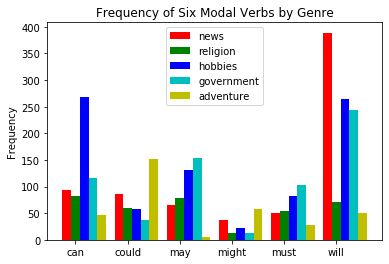

In [2]:
import numpy as np
import matplotlib.pyplot as plt

colors = "rgbcymk" # red, green, blue, cyan, magenta, yellow, black

def bar_chart(categories, words, counts):
    "Plot a bar chart showing counts for each word by category"
    ind = np.arange(len(words))
    width = 1 / (len(categories) + 1)
    bar_groups = []
    for c in range(len(categories)):
        bars = plt.bar(ind + c * width, counts[categories[c]], width,
                      color=colors[c % len(colors)])
        bar_groups.append(bars)
    plt.xticks(ind + width, words)
    plt.legend([b[0] for b in bar_groups], categories)
    plt.ylabel("Frequency")
    plt.title("Frequency of Six Modal Verbs by Genre")
    plt.show()
    
genres = ['news', 'religion', 'hobbies', 'government', 'adventure']
modals = ['can', 'could', 'may', 'might', 'must', 'will']
cfdist = nltk.ConditionalFreqDist(
                    (genre, word)
                    for genre in genres
                    for word in nltk.corpus.brown.words(categories=genre)
                    if word in modals)

counts = {}
for genre in genres:
    counts[genre] = [cfdist[genre][word] for word in modals]

bar_chart(genres, modals, counts)

### NetworkX
The NetworkX package is for defining and manipulating structures consisting of nodes and edges, known as graphs. It is available from https://networkx.lanl.gov/. NetworkX can be used in conjunction with Matplotlib to visualize networks, such as WordNet (the semantic network we introduced in 5). The program in 4.15 initializes an empty graph [3] then traverses the WordNet hypernym hierarchy adding edges to the graph [1]. Notice that the traversal is recursive [2], applying the programming technique discussed in 4.7. The resulting display is shown in 4.16.

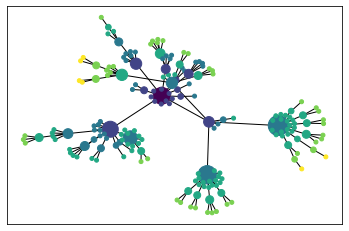

In [8]:
import networkx as nx
import matplotlib
from nltk.corpus import wordnet as wn

def traverse(graph, start, node):
    graph.depth[node.name] = node.shortest_path_distance(start)
    for child in node.hyponyms():
        graph.add_edge(node.name, child.name)
        traverse(graph, start, child)
        
def hyponym_graph(start):
    G = nx.Graph()
    G.depth = {}
    traverse(G, start, start)
    return G

def graph_draw(graph):
    nx.draw_networkx(graph,
                    node_size = [16 * graph.degree(n) for n in graph],
                    node_color = [graph.depth[n] for n in graph],
                    with_labels = False)
    matplotlib.pyplot.show()
    
dog = wn.synset("dog.n.01")
graph = hyponym_graph(dog)
graph_draw(graph)

In [17]:
dog = wn.synset("dog.n.01")
[d.name() for d in dog.hyponyms()]

['basenji.n.01',
 'corgi.n.01',
 'cur.n.01',
 'dalmatian.n.02',
 'great_pyrenees.n.01',
 'griffon.n.02',
 'hunting_dog.n.01',
 'lapdog.n.01',
 'leonberg.n.01',
 'mexican_hairless.n.01',
 'newfoundland.n.01',
 'pooch.n.01',
 'poodle.n.01',
 'pug.n.01',
 'puppy.n.01',
 'spitz.n.01',
 'toy_dog.n.01',
 'working_dog.n.01']